# Maximum A Posteriori (MAP) Estimation

Maximum A Posteriori (MAP) estimation is a powerful method in statistical inference that combines elements of both frequentist and Bayesian approaches. It serves as a bridge between Maximum Likelihood Estimation (MLE) and full Bayesian estimation, offering a point estimate of parameters while incorporating prior knowledge.


MAP estimation aims to find the mode of the posterior distribution - the most probable parameter value given the observed data and prior beliefs. Mathematically, it seeks to maximize the posterior probability:

$$\hat{\theta}_{MAP} = \arg\max_{\theta} P(\theta|X) = \arg\max_{\theta} [P(X|\theta)P(\theta)]$$


Where:
- $\hat{\theta}_{MAP}$ is the MAP estimate
- $P(\theta|X)$ is the posterior probability
- $P(X|\theta)$ is the likelihood
- $P(\theta)$ is the prior probability


🔑 **Key Insight**: MAP combines the likelihood (which MLE maximizes) with prior information about the parameters.


MAP estimation emerged as statisticians sought ways to incorporate prior knowledge into parameter estimation without the full computational burden of Bayesian inference. It has roots in both Bayesian statistics and optimization theory.


Comparing MAP estimation to MLE and full Bayesian inference can provide valuable insights:

- **Compared to MLE**: MAP incorporates prior information, potentially leading to more robust estimates, especially with limited data.
- **Compared to Full Bayesian**: MAP provides a point estimate, which can be computationally simpler than dealing with full posterior distributions.


💡 **Pro Tip**: Think of MAP as a "regularized" version of MLE, where the prior acts as a regularization term.


In this lecture, we'll delve into the mathematical foundations of MAP, explore its applications, and discuss its strengths and limitations. By the end, you'll understand how to apply MAP estimation in various machine learning scenarios and appreciate its role in the broader landscape of statistical inference.


Understanding MAP estimation will enhance your toolkit for parameter estimation, providing a middle ground between the simplicity of MLE and the full probabilistic approach of Bayesian inference.

**Table of contents**<a id='toc0_'></a>    
- [Theoretical Foundation: Bayes' Theorem Revisited](#toc1_)    
  - [Components of Bayes' Theorem in MAP Context](#toc1_1_)    
  - [MAP and Bayes' Theorem](#toc1_2_)    
  - [Logarithmic Form](#toc1_3_)    
  - [Importance in MAP Estimation](#toc1_4_)    
- [Mathematical Formulation of MAP](#toc2_)    
  - [Logarithmic Form](#toc2_1_)    
  - [Optimization Problem](#toc2_2_)    
  - [Solving for MAP Estimates](#toc2_3_)    
  - [Example: Gaussian Distribution with Gaussian Prior](#toc2_4_)    
  - [Numerical Methods](#toc2_5_)    
  - [Connection to Regularization](#toc2_6_)    
- [Comparison with MLE and Full Bayesian Estimation](#toc3_)    
  - [Detailed Comparison](#toc3_1_)    
  - [Mathematical Relationship](#toc3_2_)    
  - [When to Use Each Method](#toc3_3_)    
  - [Example: Linear Regression](#toc3_4_)    
- [Practical Examples and Implementation](#toc4_)    
  - [Example 1: Coin Flip (Bernoulli Distribution)](#toc4_1_)    
  - [Example 2: Height Estimation (Gaussian Distribution)](#toc4_2_)    
  - [Key Points](#toc4_3_)    
- [Summary](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Theoretical Foundation: Bayes' Theorem Revisited](#toc0_)

To understand MAP estimation, we need to revisit Bayes' theorem, which forms the cornerstone of Bayesian inference and, by extension, MAP estimation.


Bayes' theorem, named after Thomas Bayes, provides a way to update our beliefs about a hypothesis given new evidence. In the context of parameter estimation, it allows us to update our beliefs about parameter values given observed data.


The theorem is expressed as:

$$P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)}$$


Where:
- $P(\theta|X)$ is the posterior probability of the parameters given the data
- $P(X|\theta)$ is the likelihood of the data given the parameters
- $P(\theta)$ is the prior probability of the parameters
- $P(X)$ is the marginal likelihood or evidence


🔑 **Key Insight**: Bayes' theorem shows how to combine prior knowledge with observed data to obtain updated beliefs.


### <a id='toc1_1_'></a>[Components of Bayes' Theorem in MAP Context](#toc0_)


1. **Posterior Probability $P(\theta|X)$**:
   - This is what we're ultimately interested in for MAP estimation.
   - It represents our updated beliefs about the parameters after observing the data.

2. **Likelihood $P(X|\theta)$**:
   - This is the probability of observing the data given specific parameter values.
   - It's the same likelihood used in Maximum Likelihood Estimation (MLE).

3. **Prior Probability $P(\theta)$**:
   - This represents our initial beliefs about the parameters before observing any data.
   - It's a key difference between MAP and MLE.

4. **Marginal Likelihood $P(X)$**:
   - Also known as the evidence, it's the probability of observing the data averaged over all possible parameter values.
   - It acts as a normalizing constant in Bayes' theorem.


### <a id='toc1_2_'></a>[MAP and Bayes' Theorem](#toc0_)


MAP estimation focuses on finding the mode of the posterior distribution. Mathematically:

$$\hat{\theta}_{MAP} = \arg\max_{\theta} P(\theta|X)$$


Using Bayes' theorem, we can rewrite this as:

$$\hat{\theta}_{MAP} = \arg\max_{\theta} \frac{P(X|\theta)P(\theta)}{P(X)}$$


Since $P(X)$ doesn't depend on $\theta$, we can simplify:

$$\hat{\theta}_{MAP} = \arg\max_{\theta} P(X|\theta)P(\theta)$$


💡 **Pro Tip**: Notice how MAP combines the likelihood (which MLE maximizes) with the prior probability.


### <a id='toc1_3_'></a>[Logarithmic Form](#toc0_)


In practice, we often work with the logarithm of the posterior for computational convenience:

$$\hat{\theta}_{MAP} = \arg\max_{\theta} [\log P(X|\theta) + \log P(\theta)]$$


This form clearly shows MAP as a balance between maximizing the log-likelihood (as in MLE) and the log-prior.


### <a id='toc1_4_'></a>[Importance in MAP Estimation](#toc0_)


Understanding Bayes' theorem is crucial for MAP estimation because:

1. It provides the theoretical justification for incorporating prior knowledge.
2. It shows how MAP naturally balances prior beliefs with observed data.
3. It helps in interpreting MAP estimates in a probabilistic framework.


🔑 **Key Takeaway**: Bayes' theorem provides the foundation for MAP estimation, allowing us to combine prior knowledge with observed data in a principled way.


By revisiting Bayes' theorem, we set the stage for a deeper understanding of MAP estimation, its relationship to other estimation methods, and its role in modern machine learning and statistical inference.

## <a id='toc2_'></a>[Mathematical Formulation of MAP](#toc0_)

The mathematical formulation of MAP estimation provides a rigorous framework for finding the most probable parameter values given observed data and prior beliefs. Let's break down this formulation step by step.


As we've seen, MAP estimation seeks to maximize the posterior probability:

$$\hat{\theta}_{MAP} = \arg\max_{\theta} P(\theta|X)$$


Using Bayes' theorem, we can expand this:

$$\hat{\theta}_{MAP} = \arg\max_{\theta} \frac{P(X|\theta)P(\theta)}{P(X)}$$


Since $P(X)$ is constant with respect to $\theta$, we can simplify:

$$\hat{\theta}_{MAP} = \arg\max_{\theta} P(X|\theta)P(\theta)$$


🔑 **Key Insight**: MAP combines the likelihood $P(X|\theta)$ with the prior $P(\theta)$.


### <a id='toc2_1_'></a>[Logarithmic Form](#toc0_)


In practice, we often work with the log-posterior for computational convenience:

$$\hat{\theta}_{MAP} = \arg\max_{\theta} [\log P(X|\theta) + \log P(\theta)]$$


This form has several advantages:
1. It converts products to sums, which is computationally easier.
2. It helps prevent underflow for very small probabilities.
3. It often simplifies the optimization process.


### <a id='toc2_2_'></a>[Optimization Problem](#toc0_)


MAP estimation can be viewed as an optimization problem:

1. **Objective Function**: $J(\theta) = \log P(X|\theta) + \log P(\theta)$
2. **Goal**: Find $\theta$ that maximizes $J(\theta)$


### <a id='toc2_3_'></a>[Solving for MAP Estimates](#toc0_)


To find the MAP estimate, we typically follow these steps:

1. Take the derivative of the log-posterior with respect to $\theta$:

   $$\frac{\partial}{\partial \theta} [\log P(X|\theta) + \log P(\theta)] = 0$$

2. Solve the resulting equation(s).

3. Check the second derivative to ensure it's a maximum:

   $$\frac{\partial^2}{\partial \theta^2} [\log P(X|\theta) + \log P(\theta)] < 0$$


### <a id='toc2_4_'></a>[Example: Gaussian Distribution with Gaussian Prior](#toc0_)


Let's consider a concrete example. Suppose we have data from a Gaussian distribution with unknown mean $\mu$ and known variance $\sigma^2$, and we place a Gaussian prior on $\mu$:

- Likelihood: $X_i \sim N(\mu, \sigma^2)$
- Prior: $\mu \sim N(\mu_0, \tau^2)$


The log-posterior is:

$$\log P(\mu|X) \propto -\frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - \mu)^2 - \frac{1}{2\tau^2}(\mu - \mu_0)^2 + \text{const}$$


Taking the derivative and setting to zero:

$$\frac{\partial}{\partial \mu} \left[-\frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - \mu)^2 - \frac{1}{2\tau^2}(\mu - \mu_0)^2\right] = 0$$


Solving this equation gives the MAP estimate:

$$\hat{\mu}_{MAP} = \frac{\frac{n}{\sigma^2}\bar{x} + \frac{1}{\tau^2}\mu_0}{\frac{n}{\sigma^2} + \frac{1}{\tau^2}}$$


This result shows how MAP balances the sample mean $\bar{x}$ with the prior mean $\mu_0$.


### <a id='toc2_5_'></a>[Numerical Methods](#toc0_)


For more complex models, closed-form solutions may not exist. In such cases, numerical optimization methods are used:

1. Gradient Descent
2. Newton's Method
3. Conjugate Gradient
4. BFGS (Broyden–Fletcher–Goldfarb–Shanno algorithm)


💡 **Pro Tip**: In practice, many machine learning libraries provide optimizers that can be used for MAP estimation.


### <a id='toc2_6_'></a>[Connection to Regularization](#toc0_)


The MAP formulation provides a probabilistic interpretation of regularization in machine learning:

$$\hat{\theta}_{MAP} = \arg\max_{\theta} [\log P(X|\theta) + \log P(\theta)]$$


Here, $\log P(\theta)$ acts as a regularization term, penalizing unlikely parameter values according to the prior.


🔑 **Key Takeaway**: The mathematical formulation of MAP estimation provides a principled way to incorporate prior knowledge into parameter estimation, balancing this prior with the observed data.


Understanding this formulation is crucial for applying MAP in various contexts, from simple statistical models to complex machine learning algorithms. It provides the foundation for many advanced techniques in Bayesian machine learning and regularized optimization.

## <a id='toc3_'></a>[Comparison with MLE and Full Bayesian Estimation](#toc0_)

To fully appreciate MAP estimation, it's crucial to understand how it relates to and differs from Maximum Likelihood Estimation (MLE) and full Bayesian estimation. Each method has its strengths and limitations, making them suitable for different scenarios. Let's compare these methods in detail.

1. **Maximum Likelihood Estimation (MLE)**
   - Finds the parameter values that maximize the likelihood of the observed data.
   - $\hat{\theta}_{MLE} = \arg\max_{\theta} P(X|\theta)$

2. **Maximum A Posteriori (MAP) Estimation**
   - Finds the parameter values that maximize the posterior probability.
   - $\hat{\theta}_{MAP} = \arg\max_{\theta} P(\theta|X) = \arg\max_{\theta} [P(X|\theta)P(\theta)]$

3. **Full Bayesian Estimation**
   - Computes the entire posterior distribution of the parameters.
   - $P(\theta|X) \propto P(X|\theta)P(\theta)$


### <a id='toc3_1_'></a>[Detailed Comparison](#toc0_)


**1. Incorporation of Prior Knowledge**

- **MLE**: Does not use prior information about parameters.
- **MAP**: Incorporates prior beliefs through the prior distribution $P(\theta)$.
- **Full Bayesian**: Fully incorporates prior information and provides a posterior distribution.


🔑 **Key Insight**: MAP can be seen as a compromise between MLE (no prior) and full Bayesian (full prior incorporation).


**2. Output**

- **MLE**: Point estimate of parameters.
- **MAP**: Point estimate of parameters, but influenced by the prior.
- **Full Bayesian**: Full posterior distribution of parameters.


**3. Uncertainty Quantification**

- **MLE**: Typically requires additional methods (e.g., bootstrapping) for uncertainty estimation.
- **MAP**: Point estimate, but the curvature of the posterior at the MAP can provide local uncertainty information.
- **Full Bayesian**: Provides complete uncertainty quantification through the posterior distribution.


**4. Computational Complexity**

- **MLE**: Often the least computationally intensive.
- **MAP**: Generally more complex than MLE but simpler than full Bayesian.
- **Full Bayesian**: Usually the most computationally intensive, especially for complex models.


**5. Handling of Small Sample Sizes**

- **MLE**: Can be unreliable with small samples.
- **MAP**: Often more robust than MLE for small samples due to the regularizing effect of the prior.
- **Full Bayesian**: Handles small samples well by fully accounting for parameter uncertainty.


**6. Asymptotic Behavior**

- **MLE**: Converges to the true parameter values as sample size increases (under certain conditions).
- **MAP**: Converges to MLE as sample size increases (the likelihood dominates the prior).
- **Full Bayesian**: Posterior distribution concentrates around the true parameter values as sample size increases.


### <a id='toc3_2_'></a>[Mathematical Relationship](#toc0_)


To see the relationship mathematically:

1. MLE maximizes: $\log P(X|\theta)$
2. MAP maximizes: $\log P(X|\theta) + \log P(\theta)$
3. Full Bayesian computes: $P(\theta|X) \propto P(X|\theta)P(\theta)$


💡 **Pro Tip**: You can view MAP as a regularized version of MLE, where the log-prior acts as a regularization term.


### <a id='toc3_3_'></a>[When to Use Each Method](#toc0_)


- **Use MLE when**: 
  - You have large sample sizes.
  - You want a simple, computationally efficient method.
  - You don't have reliable prior information.

- **Use MAP when**:
  - You have informative priors but want a point estimate.
  - You're dealing with moderate sample sizes.
  - You want to incorporate regularization in a principled way.

- **Use Full Bayesian when**:
  - You need complete uncertainty quantification.
  - You're dealing with small sample sizes or complex models.
  - You want to perform model averaging or hierarchical modeling.


### <a id='toc3_4_'></a>[Example: Linear Regression](#toc0_)


Consider a simple linear regression $y = \beta x + \epsilon$:

- **MLE**: Minimizes the sum of squared errors.
- **MAP**: Minimizes the sum of squared errors plus a term from the log-prior (e.g., L2 regularization for a Gaussian prior).
- **Full Bayesian**: Computes a distribution over possible $\beta$ values.


🔑 **Key Takeaway**: MAP estimation offers a middle ground between the simplicity of MLE and the comprehensive uncertainty handling of full Bayesian methods. It allows for the incorporation of prior knowledge while still providing a point estimate, making it a valuable tool in many machine learning and statistical inference tasks.


Understanding these relationships and trade-offs allows you to choose the most appropriate method for your specific problem, balancing prior knowledge, computational resources, and the need for uncertainty quantification.

## <a id='toc4_'></a>[Practical Examples and Implementation](#toc0_)

To solidify our understanding of MAP estimation, let's look at some simple, practical examples and their implementation in Python. We'll use basic scenarios to illustrate the concepts clearly.


### <a id='toc4_1_'></a>[Example 1: Coin Flip (Bernoulli Distribution)](#toc0_)


Imagine we're estimating the probability of heads for a potentially biased coin.


Problem Setup:
- We observe 7 heads out of 10 flips.
- We have a prior belief that the coin is fair (Beta(5,5) prior).


Here's how we can implement this in Python:


MAP estimate: 0.611


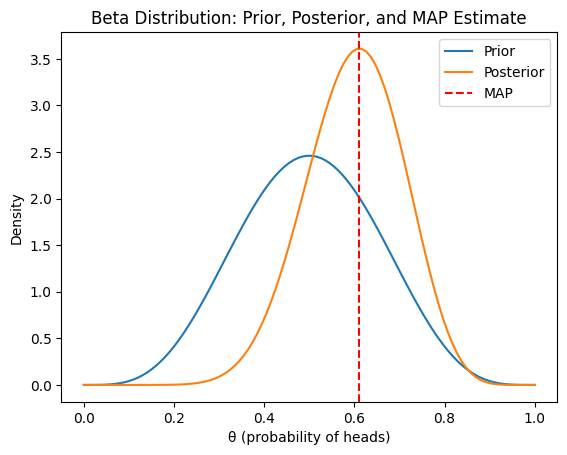

In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Data
n_flips = 10
n_heads = 7

# Prior parameters (Beta distribution)
prior_a, prior_b = 5, 5

# Posterior parameters
post_a = prior_a + n_heads
post_b = prior_b + (n_flips - n_heads)

# MAP estimate
map_estimate = (post_a - 1) / (post_a + post_b - 2)

print(f"MAP estimate: {map_estimate:.3f}")

# Plotting
theta = np.linspace(0, 1, 100)
plt.plot(theta, beta.pdf(theta, prior_a, prior_b), label='Prior')
plt.plot(theta, beta.pdf(theta, post_a, post_b), label='Posterior')
plt.axvline(map_estimate, color='r', linestyle='--', label='MAP')
plt.legend()
plt.title('Beta Distribution: Prior, Posterior, and MAP Estimate')
plt.xlabel('θ (probability of heads)')
plt.ylabel('Density')
plt.show()

This example shows how MAP combines the prior belief (a fair coin) with the observed data (7 heads out of 10) to produce an estimate.


### <a id='toc4_2_'></a>[Example 2: Height Estimation (Gaussian Distribution)](#toc0_)


Let's estimate the average height of a population.


**Problem Setup:**
- We observe heights: [170, 175, 172, 169, 171] cm
- We have a prior belief that the average height is 168 cm with a standard deviation of 5 cm


Here is the Python implementation:


MAP estimate: 171.01 cm


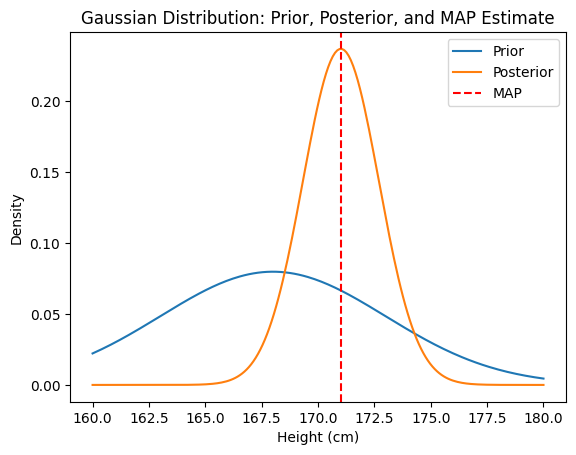

In [2]:
import numpy as np
from scipy.stats import norm

# Data
heights = np.array([170, 175, 172, 169, 171])

# Prior parameters
prior_mean = 168
prior_std = 5

# Known population standard deviation (assumed for simplicity)
population_std = 4

# Calculate posterior parameters
n = len(heights)
sample_mean = np.mean(heights)

posterior_var = 1 / ((1 / prior_std**2) + (n / population_std**2))
posterior_mean = posterior_var * ((prior_mean / prior_std**2) + (n * sample_mean / population_std**2))

# MAP estimate is the posterior mean in this case
map_estimate = posterior_mean

print(f"MAP estimate: {map_estimate:.2f} cm")

# Plotting
x = np.linspace(160, 180, 200)
plt.plot(x, norm.pdf(x, prior_mean, prior_std), label='Prior')
plt.plot(x, norm.pdf(x, posterior_mean, np.sqrt(posterior_var)), label='Posterior')
plt.axvline(map_estimate, color='r', linestyle='--', label='MAP')
plt.legend()
plt.title('Gaussian Distribution: Prior, Posterior, and MAP Estimate')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()

This example demonstrates how MAP balances prior beliefs about average height with observed data to produce an estimate.


### <a id='toc4_3_'></a>[Key Points](#toc0_)


1. **Prior Incorporation**: Both examples show how prior beliefs influence the final estimate.

2. **Data Influence**: As we get more data, its influence on the MAP estimate increases.

3. **Visualization**: Plotting prior, posterior, and MAP estimate helps in understanding their relationships.

4. **Simplicity of Implementation**: For conjugate priors (like Beta-Binomial or Gaussian-Gaussian), MAP estimation can be straightforward.

5. **Interpretation**: The MAP estimate provides a single "best guess" based on both prior knowledge and observed data.


🔑 **Key Takeaway**: MAP estimation provides a practical way to combine prior beliefs with observed data, resulting in estimates that balance both sources of information.


These simple examples serve as a foundation for understanding MAP estimation in practice. As you encounter more complex scenarios, the core principles remain the same, though the implementation may become more sophisticated, often requiring numerical optimization techniques.

## <a id='toc5_'></a>[Summary](#toc0_)

As we conclude our exploration of Maximum A Posteriori (MAP) estimation, let's recap the main points and highlight the key takeaways from this lecture:

1. **Definition of MAP**
   - MAP finds the mode of the posterior distribution.
   - It combines prior knowledge with observed data to estimate parameters.

2. **Bayes' Theorem Foundation**
   - MAP is based on Bayes' theorem: $P(\theta|X) \propto P(X|\theta)P(\theta)$
   - It balances likelihood (data fit) with prior beliefs.

3. **Mathematical Formulation**
   - $\hat{\theta}_{MAP} = \arg\max_{\theta} [P(X|\theta)P(\theta)]$
   - Often solved using log-posterior: $\arg\max_{\theta} [\log P(X|\theta) + \log P(\theta)]$

4. **Comparison with Other Methods**
   - MLE: MAP with uniform prior
   - Full Bayesian: MAP provides a point estimate, while Bayesian gives full posterior

5. **Role of Prior Distributions**
   - Priors incorporate domain knowledge or previous data
   - They act as regularizers, especially with limited data

6. **Computational Approaches**
   - Analytical solutions for simple models
   - Numerical optimization for complex cases (e.g., gradient descent)

7. **Applications in Machine Learning**
   - Regularized regression (e.g., Ridge, Lasso)
   - Bayesian neural networks
   - Probabilistic graphical models


🌟 **Key Takeaways**:
- Consider MAP when you have meaningful prior information but need point estimates.
- Use MAP as a stepping stone to understand full Bayesian methods.
- Implement MAP to introduce regularization in a principled, probabilistic manner.
- Be aware of the trade-offs: MAP doesn't provide full uncertainty quantification like Bayesian methods.


Understanding MAP estimation opens doors to more advanced topics in machine learning and statistics:

- Variational inference techniques
- Empirical Bayes methods
- Advanced regularization techniques in deep learning


🚀 **Final Thought**: MAP estimation is a powerful tool in the data scientist's toolkit, offering a balance between incorporating prior knowledge and computational tractability. By mastering MAP, you're well-equipped to tackle a wide range of parameter estimation problems in machine learning and statistics, especially in scenarios where you need to balance prior beliefs with observed data.


As you apply MAP in your work, remember that it's not just about getting a point estimate – it's about thinking probabilistically and leveraging all available information to make better inferences and decisions in the face of uncertainty.